In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting


In [4]:
#Reading DataSet

fuel_data = pd.read_csv('Dataset.csv')
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2000_12_7_2_4,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


.......................

### Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [6]:
fuel_data.groupby('fuel_type_code_pudl').mean()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937


...........

### What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [31]:
fuel_data.fuel_mmbtu_per_unit.describe()

#This is used to get a statistical summary of the column fuel_mmbtu_per_unit

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

............

### What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [43]:
#Extracting the fuel quantity burned column

x= fuel_data.groupby('fuel_qty_burned')

In [12]:
print(pd.DataFrame(x).skew())
print(pd.DataFrame(x).kurtosis())

0    15.18829
dtype: float64
0    596.572444
dtype: float64


...................

### Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

In [15]:
fuel_data.isnull().sum()

#Checking for Missing Values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [39]:
#  percentage of the missing rows of Fuel Unit as a factor of the total number of rows in three decimal places?

empty_fuel_unit =fuel_data['fuel_unit'].isnull().sum()
non_empty_fuel_unit= fuel_data['fuel_unit'].count()

percent =empty_fuel_unit / non_empty_fuel_unit

percent

0.006134342091810653

............................

### Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

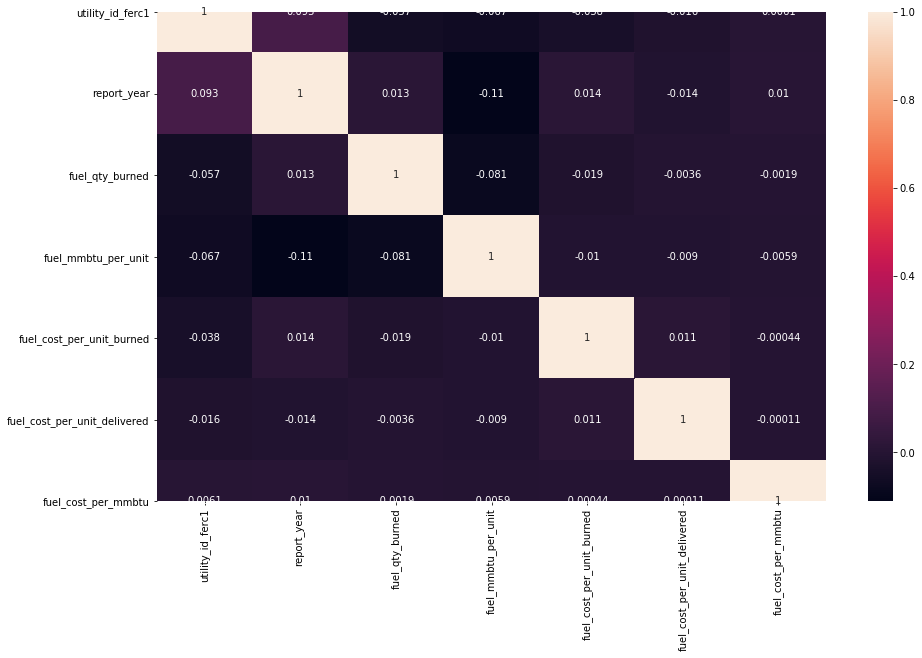

In [30]:
#Checking for Data Correlation

plt.rc('figure', figsize=(15, 9)) #To increase the Chart size

sns.heatmap(fuel_data.corr(), annot=True) 

#From the chart, we can deduce the correlation between the various columns

In [58]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].value_counts()

fuel_type_code_pudl  fuel_cost_per_unit_burned
coal                 0.000                        12
                     18.580                        8
                     22.980                        7
                     26.350                        7
                     28.390                        6
                                                  ..
waste                82.479                        1
                     82.661                        1
                     91.200                        1
                     103.568                       1
                     132.291                       1
Name: fuel_cost_per_unit_burned, Length: 20779, dtype: int64

.......................

### Which year has the highest average fuel cost per unit delivered?

In [28]:
#Which year has the highest average fuel cost per unit delivered?

fuel_data.groupby('fuel_cost_per_unit_delivered').mean()

#We pick the last column for the year as the fuel cost per unit delivered is arranged in ascending order

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_mmbtu
fuel_cost_per_unit_delivered,,,,,,
-874.937,177.0,2008.0,811.000000,5.754000,86.628000,15.055
-488.054,177.0,2007.0,2240.000000,5.754000,77.605000,13.487
-313.410,210.0,2004.0,588.000000,5.712420,38.722000,6.779
-174.670,194.0,2000.0,77.333333,0.015500,-191.353333,-6.173
-170.187,6.0,2015.0,2292.000000,5.727204,123.751000,21.608
...,...,...,...,...,...,...
1942979.000,9.0,1997.0,52526.000000,0.000066,39.660000,0.560
2114508.000,9.0,1996.0,58795.000000,0.000065,35.964000,0.095
2255688.000,9.0,1997.0,36919.000000,0.000056,61.100000,1.087


................

### For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [48]:
#Splicing the Data to get Only the records for Coal in 1994

fuel_data_1994= fuel_data.loc[(fuel_data['fuel_type_code_pudl']=='coal') & (fuel_data['report_year']==1994)]

#Splicing the Data to get Only the records for Coal in 1998

fuel_data_1998= fuel_data.loc[(fuel_data['fuel_type_code_pudl']=='coal') & (fuel_data['report_year']==1998)]

In [55]:
#Total fuel cost per unit burned for 1994 and 1998

total_fuel_cost_1994 = fuel_data_1994['fuel_cost_per_unit_burned'].sum()

total_fuel_cost_1998 = fuel_data_1998['fuel_cost_per_unit_burned'].sum()

In [57]:
#To calculate the percentage Change
#(sum_1998-sum_1994)/(sum_1998)

percent_change= (total_fuel_cost_1998-total_fuel_cost_1994)/(total_fuel_cost_1994)

percent_change

-0.20567654518260528